# Task-04

<i>Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.</i>

# About Dataset

Twitter Sentiment Analysis Dataset

## Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

##  Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Reading the dataset

In [2]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv(r"C:\Users\sailo\OneDrive\Desktop\prodigy infotech\Task 4\twitter_training.csv",names=cols)

In [3]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Information about the dataframe

In [3]:
train.shape

(74682, 4)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [6]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

## Checking for null/missing values in the dataset

In [7]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

## Checking for duplicate values

In [10]:
train.duplicated().sum()

2340

In [11]:
train.drop_duplicates(inplace=True)

In [13]:
train.duplicated().sum()

0

## Visualization of count of different topics

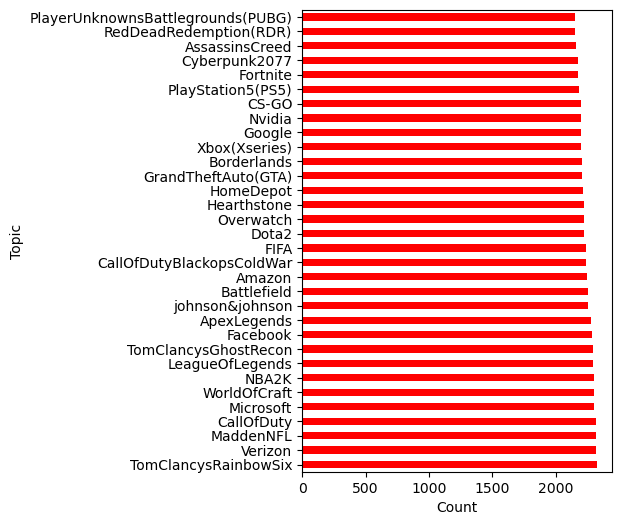

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(4,6))
train['Topic'].value_counts().plot(kind='barh',color='r')
plt.xlabel("Count")
plt.show()

## Sentiment Distribution

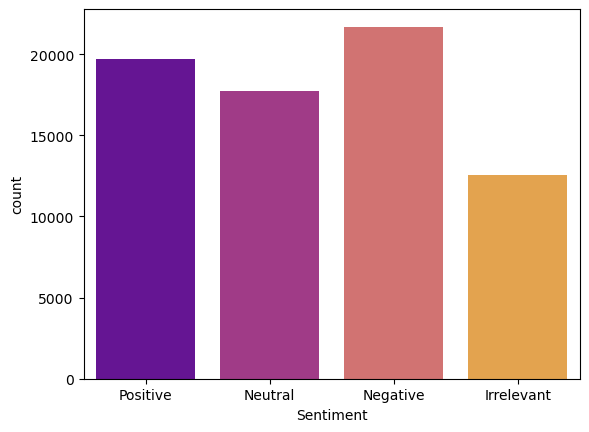

In [47]:
sns.countplot(x = 'Sentiment',data=train,palette='plasma')
plt.show()

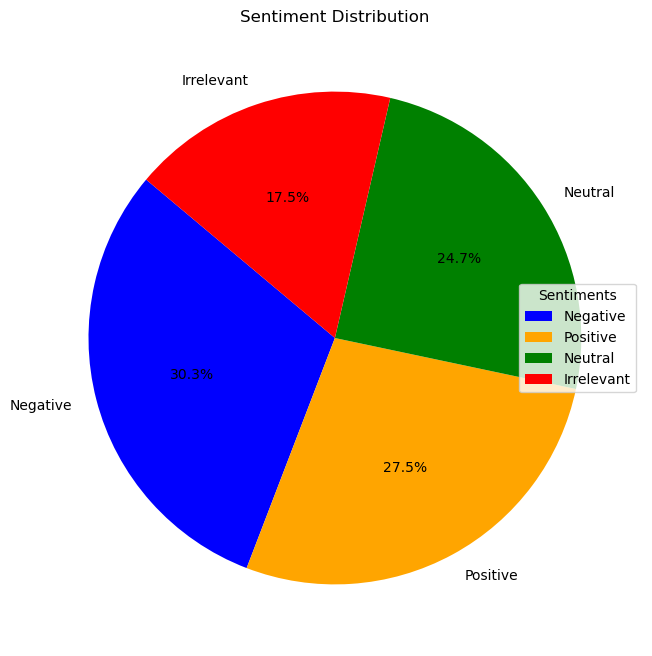

In [45]:
import matplotlib.pyplot as plt


sentiment_counts = train['Sentiment'].value_counts()


colors = ['blue', 'orange', 'green', 'red', 'purple']


plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct="%1.1f%%", startangle=140)

plt.title('Sentiment Distribution')


plt.legend(title="Sentiments", loc="center right", labels=sentiment_counts.index)

# Show the plot
plt.show()


`Observation:`
- Most topic has negative sentiment 

In [16]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


## Sentiment Distribution Topic-wise

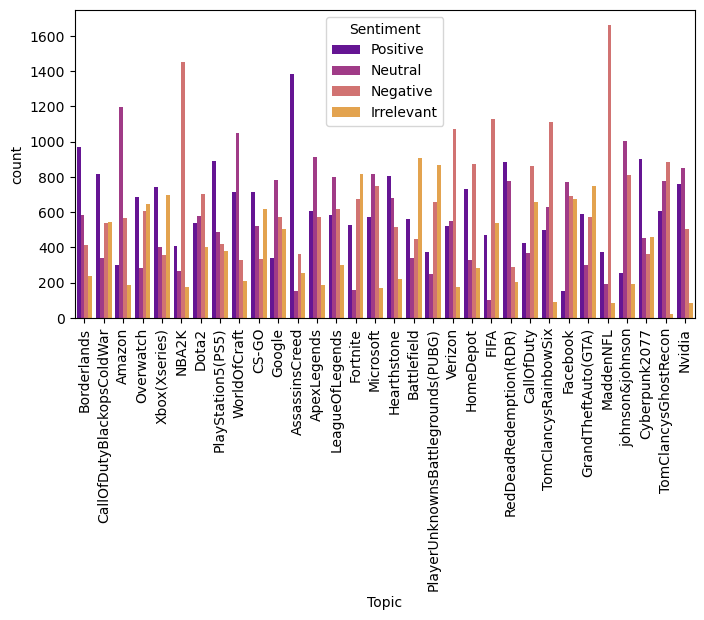

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x='Topic',data=train,palette='plasma',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [18]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

### Top 5 Topics with Negative Sentiments

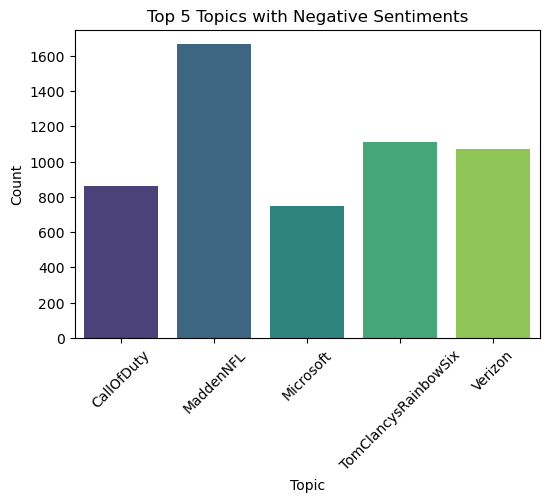

In [64]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



### Top 5 Topics with Positive Sentiments

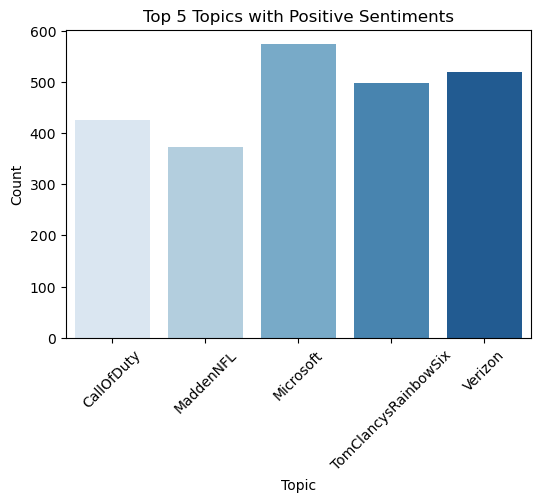

In [65]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Neutral Sentiments

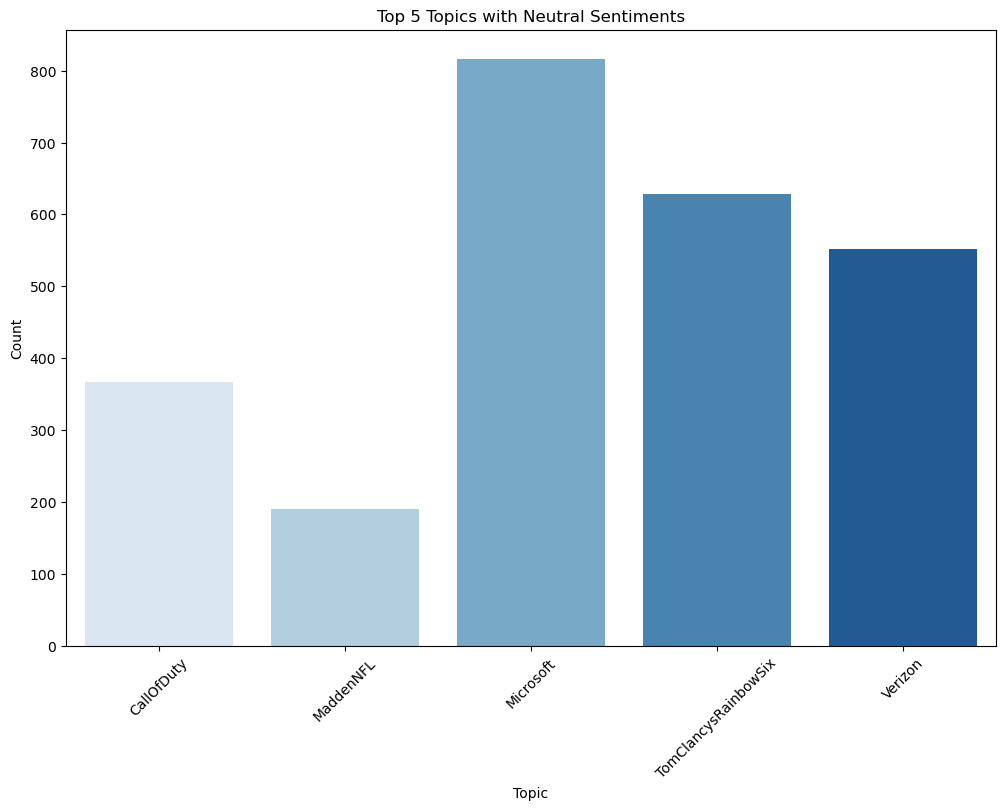

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Irrelevant Sentiments

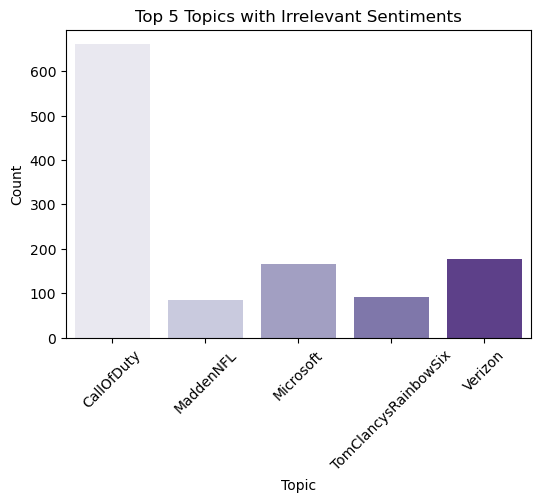

In [66]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Sentiment Distribution in Google

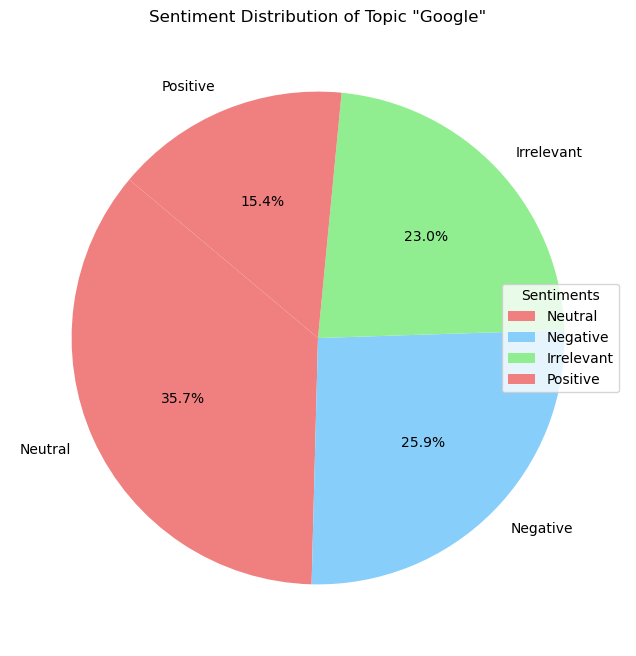

In [39]:
import matplotlib.pyplot as plt

# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Define colors for the sentiments
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')

# Adding legend with color indication
plt.legend(title="Sentiments", loc="center right", labels=sentiment_counts.index)

plt.show()


## Sentiment Distribution in Microsoft

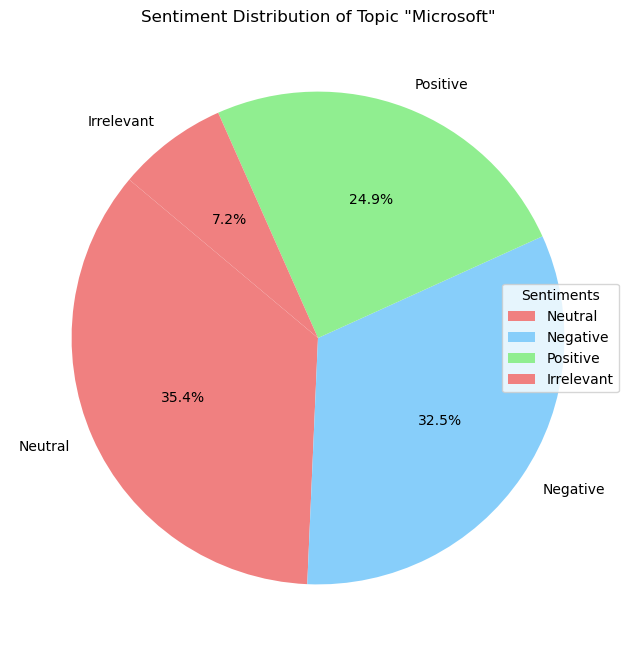

In [40]:
import matplotlib.pyplot as plt

# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Define colors for the sentiments
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')

# Adding legend with color indication
plt.legend(title="Sentiments", loc="center right", labels=sentiment_counts.index)

plt.show()


In [30]:
train['msg_len'] = train['Text'].apply(len)

In [27]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


## Plot of message length distribution for training data

C:\Users\sailo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


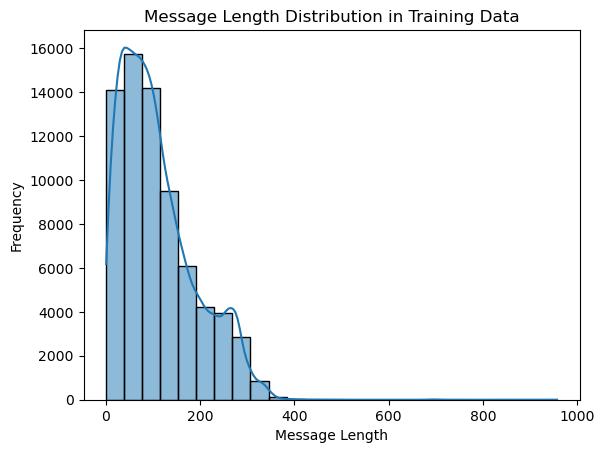

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train['msg_len'] = train['msg_len'].replace([np.inf, -np.inf], np.nan)


sns.histplot(train['msg_len'].dropna(), bins=25, kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()


## Plot message length distribution by sentiment for training data

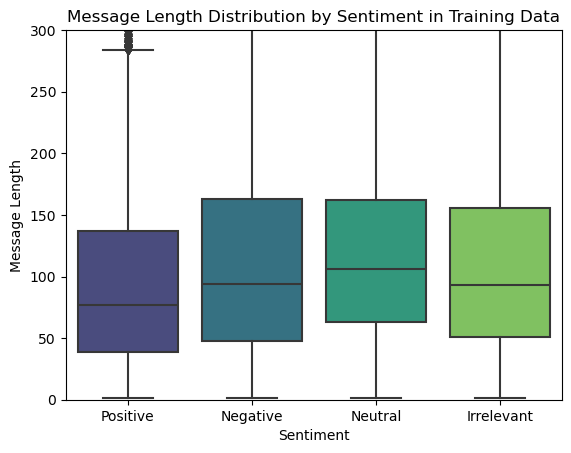

In [42]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

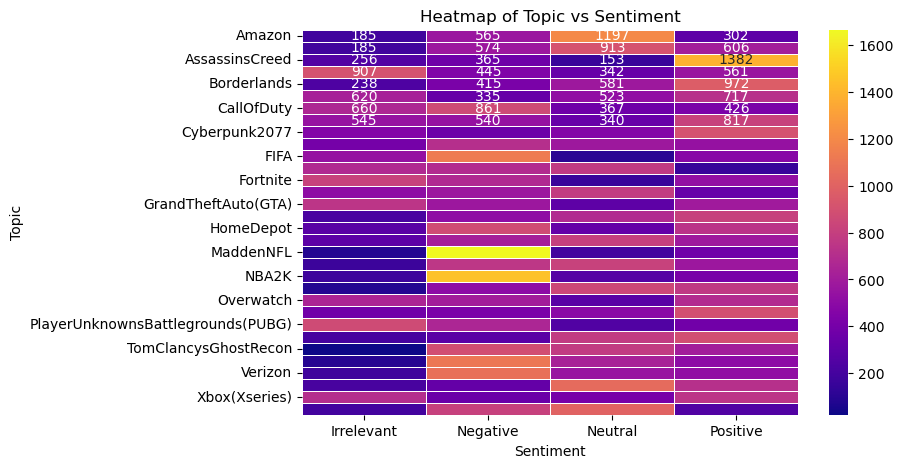

In [67]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(8, 5))  
sns.heatmap(crosstab, cmap='plasma', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()


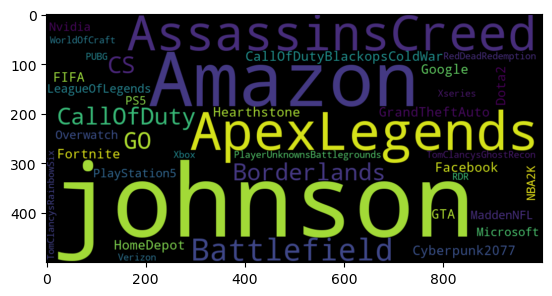

In [31]:
topic_list = ' '.join(crosstab.index)


wc = WordCloud(width=1000, height=500).generate(topic_list)

plt.imshow(wc, interpolation='bilinear')

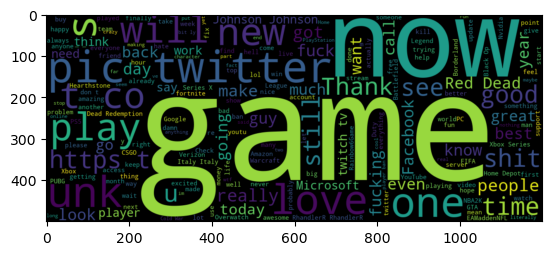

In [32]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')

 Based on the Twitter sentiment analysis, here are the key insights we've gathered:

1. **Popular Topics**: It seems that "TomClancyRainbowSix" is the most talked-about topic on Twitter based on our analysis. This indicates a high level of engagement or interest in this subject among Twitter users.

2. **Sentiment Breakdown**: We noticed that a lot of the topics are associated with a negative sentiment, accounting for about 30.3% of the sentiments we observed. Positive sentiment comes next at 27.5%, and neutral sentiment closely follows at 24.7%. Irrelevant sentiments make up around 17.5%.

3. **Sentiments for Specific Topics**: Interestingly, discussions about "Google" and "Microsoft" tend to have a more balanced, neutral sentiment. This suggests that when it comes to these tech giants, people tend to express more even-handed or impartial views.

4. **Message Length**: Most of the messages we analyzed were under 400 words, indicating that Twitter users tend to express their thoughts concisely within the platform's character limit.

In summary, this sentiment analysis gives us valuable insights into the prevailing attitudes and opinions within the Twitter community across different topics. While negative sentiments are common, there's also a diverse range of sentiments expressed about various subjects.  